# Create 5848 cuts of size 128 * 128 from the science frame

In [1]:
from astropy.io import fits 
from astropy import wcs
import numpy as np
from astropy.nddata import Cutout2D
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import stats
from skimage import color
from tqdm.notebook import tqdm

In [2]:
#Opening the files

image1 = fits.open(r"Raw Data\MeerKAT_radio_bubbles.fits")
#image2 = fits.open(r"Raw Data\G002.5+0.0.IFx_Mosaic.1pln.fits")

In [3]:
#Pre-processing

scidata = image1[0].data.squeeze()
scidata = np.where(np.isnan(scidata), 0, scidata)
scidata = scidata - np.min(scidata)
header = image1[0].header
w = wcs.WCS(header, naxis = 2)

In [4]:
scidata.shape

(11035, 8731)

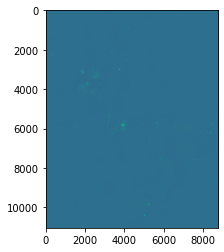

In [5]:
plt.imshow(scidata, norm=colors.PowerNorm(gamma=0.2))

In [6]:
#create cut array
cutout = Cutout2D(scidata, position=(4366, 5518), size=(9000 , 8730), wcs = w, mode='partial')

#reconnect coordinate information
new_header = cutout.wcs.to_header()
hdu = fits.PrimaryHDU(cutout.data, header=new_header)

In [7]:
scidata = hdu.data.squeeze()
header = hdu.header
w = wcs.WCS(header, naxis = 2)

In [8]:
scidata.shape

(9000, 8730)

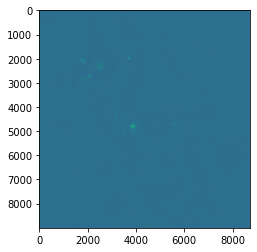

In [9]:
plt.imshow(scidata, norm=colors.PowerNorm(gamma=0.2))

In [10]:
a,b = 128,128  #image dimensions

num_a = scidata.shape[1]//a
num_b = scidata.shape[0]//b

size = ((a*u.pix, b*u.pix))

print(num_b)
print(num_a)

70
68


In [11]:
def download_image_save_cutout(n, m, f):
    """
    n iterates across columns of width 128
    m iterates down the column in 128 sized steps
    f counts up in 1 for each image to enumerate the cuts 0-5848
    """

    #create cut array
    cutout = Cutout2D(scidata, position=(a/2+n*a, b/2+m*b), size=size, wcs = w, mode='partial')
    
    #reconnect coordinate information
    new_header = cutout.wcs.to_header()
    hdu = fits.PrimaryHDU(cutout.data, header=new_header)
    
    #save
    hdu.writeto(r"Raw Data\Cuts\cut{}.fits".format(f), overwrite=True)
    
    #return(hdu)

In [12]:
#moving the center of each cut 128 pixels up per m and right 128 pixels per n.
HDUList = fits.HDUList([])
f = 0
n = 0
while n < num_a:
    m = 0
    while m < num_b:
        download_image_save_cutout(n, m, f)
        HDUList.append(download_image_save_cutout(n, m, f))
        m+=1
        f+=1
    n+=1